# **Initial Imports**

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

## **Kaggle api to access datasets**

In [41]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravmalik26/food-delivery-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/food-delivery-dataset


In [42]:
import os

# List all files in the dataset directory
print(os.listdir(path))

# Load the CSV files
train = pd.read_csv(os.path.join(path, 'train.csv'))

['Sample_Submission.csv', 'train.csv', 'test.csv']


# **Data Preparation**

In [43]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [44]:
train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

### **Handling Missing Values**

In [45]:
train.isna().any().sum() #no null values present

np.int64(0)

In [46]:
train['Delivery_person_Age'].unique()

array(['37', '34', '23', '38', '32', '22', '33', '35', '36', '21', '24',
       '29', '25', '31', '27', '26', '20', 'NaN ', '28', '39', '30', '15',
       '50'], dtype=object)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [48]:
train.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [49]:
train['Delivery_person_Ratings'] = pd.to_numeric(train['Delivery_person_Ratings'], errors='coerce')
train['multiple_deliveries'] = pd.to_numeric(train['multiple_deliveries'], errors='coerce')
train['Delivery_person_Age'] = pd.to_numeric(train['Delivery_person_Age'], errors='coerce') # Added line

train['Order_Date'] = pd.to_datetime(train['Order_Date'], errors='coerce', dayfirst=True)
train['Time_Orderd'] = pd.to_datetime(train['Time_Orderd'], format='%H:%M:%S', errors='coerce').dt.time
train['Time_Order_picked'] = pd.to_datetime(train['Time_Order_picked'], format='%H:%M:%S', errors='coerce').dt.time

train['Weatherconditions'] = train['Weatherconditions'].str.replace('conditions ', '', regex=False)
train['City'] = train['City'].str.strip()

# Clean 'Time_taken(min)' column
train['Time_taken(min)'] = train['Time_taken(min)'].str.extract(r'(\d+)').astype(float) # Changed df to train

### **Handling Outliers**

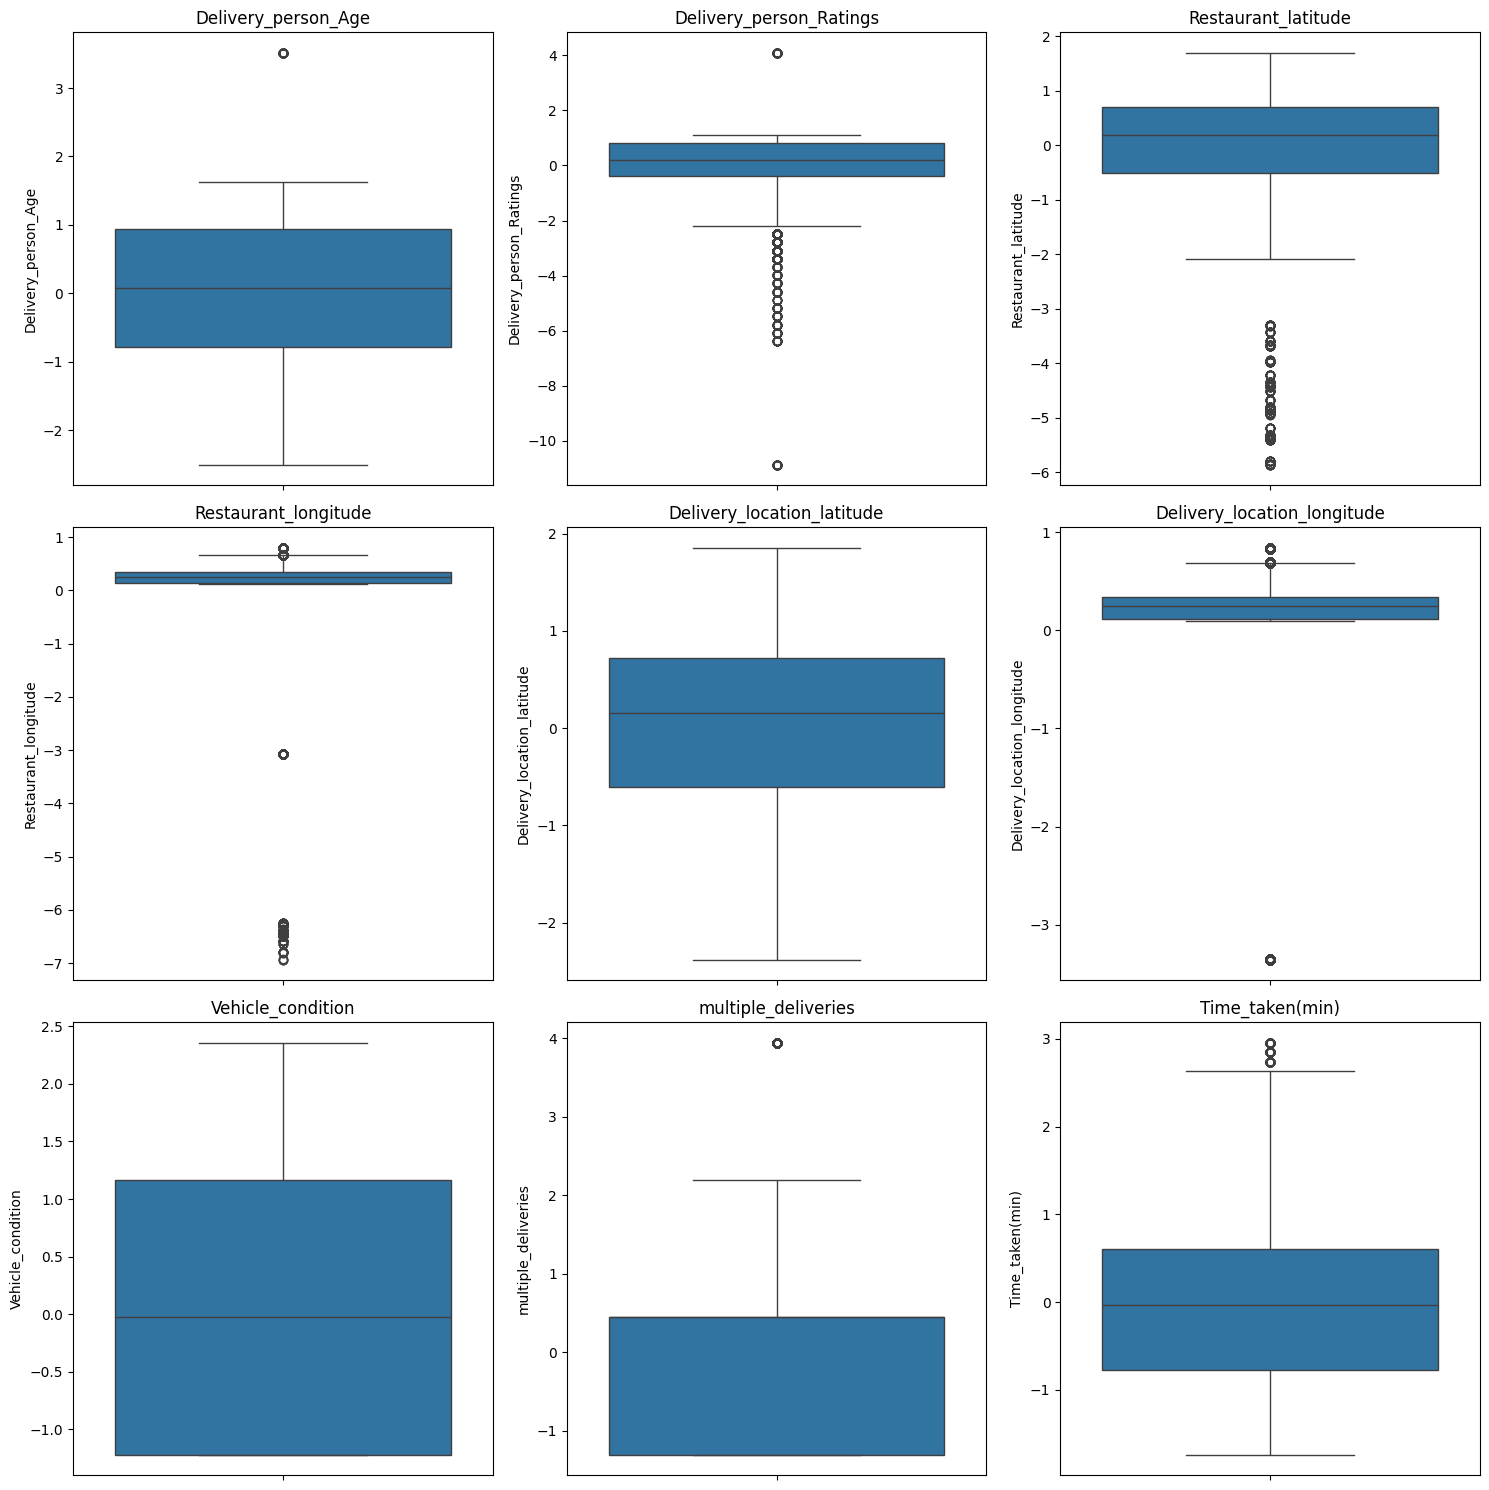

In [50]:
numerical_cols = train.select_dtypes(include=np.number).columns

n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate number of rows needed

plt.figure(figsize=(15, n_rows * 5)) # Adjust figure size based on number of rows

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot((train[col] - train[col].mean()) / train[col].std())
    plt.title(col)

plt.tight_layout()
plt.show()

In [51]:
train.isna().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,1854
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1731


Number of outliers in Delivery_person_Age: 0


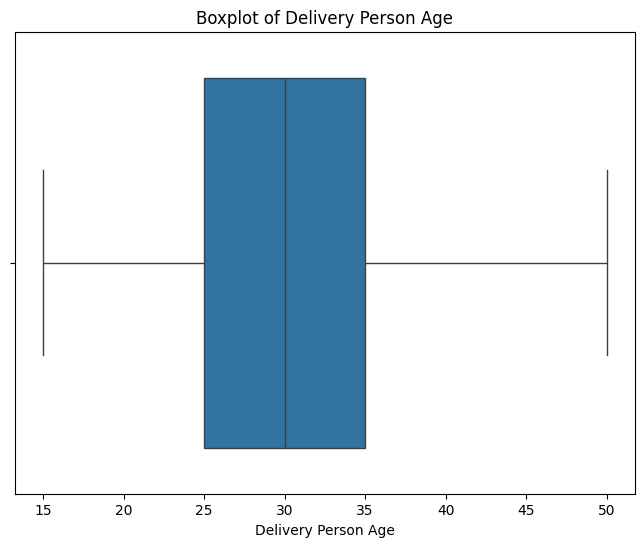

In [52]:
# Convert 'Delivery_person_Age' to numeric, coercing errors
train['Delivery_person_Age'] = pd.to_numeric(train['Delivery_person_Age'], errors='coerce')

# Drop rows where 'Delivery_person_Age' is NaN after coercion
train.dropna(subset=['Delivery_person_Age'], inplace=True)

# Calculate IQR for 'Delivery_person_Age'
Q1 = train['Delivery_person_Age'].quantile(0.25)
Q3 = train['Delivery_person_Age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = train[(train['Delivery_person_Age'] < lower_bound) | (train['Delivery_person_Age'] > upper_bound)]

print(f"Number of outliers in Delivery_person_Age: {len(outliers)}")

# Visualize the distribution of 'Delivery_person_Age' with outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=train['Delivery_person_Age'])
plt.title('Boxplot of Delivery Person Age')
plt.xlabel('Delivery Person Age')
plt.show()

# to remove outliers:
train_cleaned = train[(train['Delivery_person_Age'] >= lower_bound) & (train['Delivery_person_Age'] <= upper_bound)]

# **Dropping Unwanted Columns**

In [53]:
train.drop(['ID'],axis=1,inplace=True)
train.drop(['Delivery_person_ID'],axis=1,inplace=True)
train.drop(['Order_Date'],axis=1,inplace=True)

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43739 entries, 0 to 45592
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43739 non-null  float64
 1   Delivery_person_Ratings      43685 non-null  float64
 2   Restaurant_latitude          43739 non-null  float64
 3   Restaurant_longitude         43739 non-null  float64
 4   Delivery_location_latitude   43739 non-null  float64
 5   Delivery_location_longitude  43739 non-null  float64
 6   Time_Orderd                  43648 non-null  object 
 7   Time_Order_picked            43739 non-null  object 
 8   Weatherconditions            43739 non-null  object 
 9   Road_traffic_density         43739 non-null  object 
 10  Vehicle_condition            43739 non-null  int64  
 11  Type_of_order                43739 non-null  object 
 12  Type_of_vehicle              43739 non-null  object 
 13  multiple_deliveries  

In [55]:
train.shape

(43739, 17)

In [56]:
train.isna().sum()

,0
Delivery_person_Age,0
Delivery_person_Ratings,54
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Time_Orderd,91
Time_Order_picked,0
Weatherconditions,0
Road_traffic_density,0


In [57]:
train['Delivery_person_Ratings'].fillna(train['Delivery_person_Ratings'].mean(), inplace=True)
train['multiple_deliveries'].fillna(train['multiple_deliveries'].mode()[0], inplace=True)
train['Time_Orderd'].fillna(train['Time_Orderd'].mode()[0], inplace=True)


train['City'].replace(['NaN', 'nan', '', ' '], np.nan, inplace=True)
train['Weatherconditions'].replace(['NaN', 'nan', '', ' '], np.nan, inplace=True)


train['City'].fillna(train['City'].mode()[0],inplace=True)
train['Weatherconditions'].fillna(train['City'].mode()[0], inplace=True)

In [58]:
train.isna().sum()

,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Time_Orderd,0
Time_Order_picked,0
Weatherconditions,0
Road_traffic_density,0


In [59]:
train.shape

(43739, 17)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43739 entries, 0 to 45592
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43739 non-null  float64
 1   Delivery_person_Ratings      43739 non-null  float64
 2   Restaurant_latitude          43739 non-null  float64
 3   Restaurant_longitude         43739 non-null  float64
 4   Delivery_location_latitude   43739 non-null  float64
 5   Delivery_location_longitude  43739 non-null  float64
 6   Time_Orderd                  43739 non-null  object 
 7   Time_Order_picked            43739 non-null  object 
 8   Weatherconditions            43739 non-null  object 
 9   Road_traffic_density         43739 non-null  object 
 10  Vehicle_condition            43739 non-null  int64  
 11  Type_of_order                43739 non-null  object 
 12  Type_of_vehicle              43739 non-null  object 
 13  multiple_deliveries  

In [61]:
train.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken(min)
count,43739.000000,43739.00000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.63378,17.210960,70.661177,17.459031,70.821842,1.004733,0.748988,26.287387
std,5.815155,0.33451,7.764225,21.475005,7.342950,21.153148,0.820928,0.567763,9.368339
min,15.000000,1.00000,-30.902872,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.50000,12.933298,73.170283,12.985996,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.70000,18.551440,75.898497,18.633626,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.90000,22.732225,78.045359,22.785049,78.104095,2.000000,1.000000,32.000000
max,50.000000,6.00000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


**Exploratory Data Analysis**

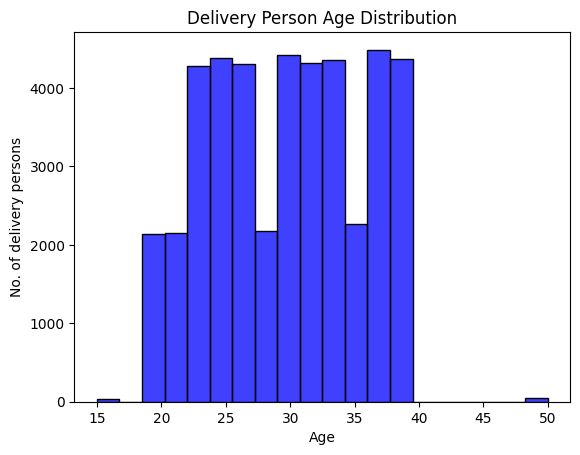

In [62]:
sns.histplot(train.Delivery_person_Age, bins=20, kde=False,color='Blue')
plt.title("Delivery Person Age Distribution")
plt.xlabel("Age")
plt.ylabel("No. of delivery persons")
plt.show()

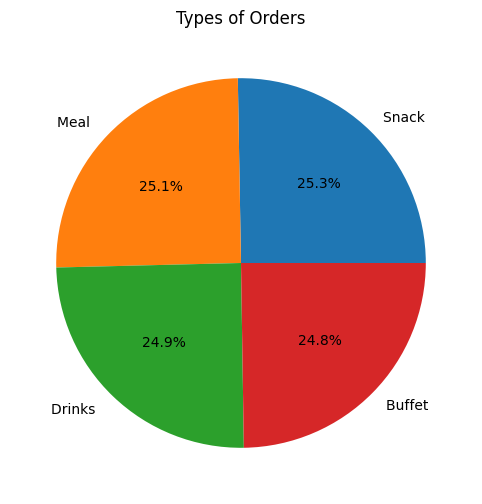

In [63]:
frequency =train['Type_of_order'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%')
plt.title("Types of Orders")
plt.show()

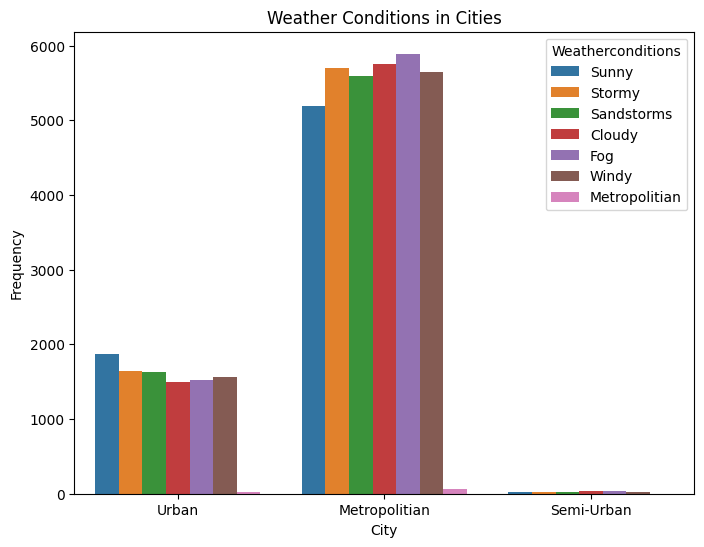

In [64]:
freq = train['City'].value_counts()
plt.figure(figsize=(8,6))
sns.countplot(data=train, x='City', hue='Weatherconditions')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Weather Conditions in Cities')
plt.legend(title='Weatherconditions')
plt.show()

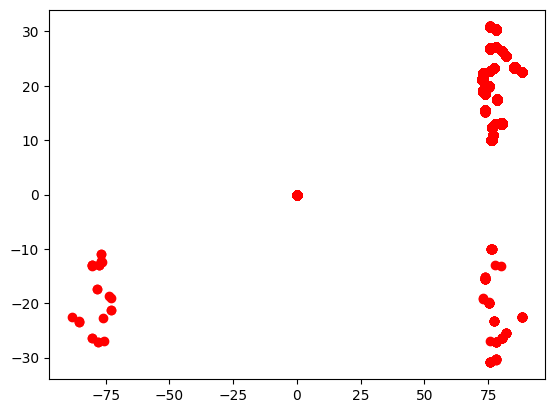

In [65]:
plt.scatter(x=train['Restaurant_longitude'], y=train['Restaurant_latitude'], color='red')
plt.show()

<Axes: >

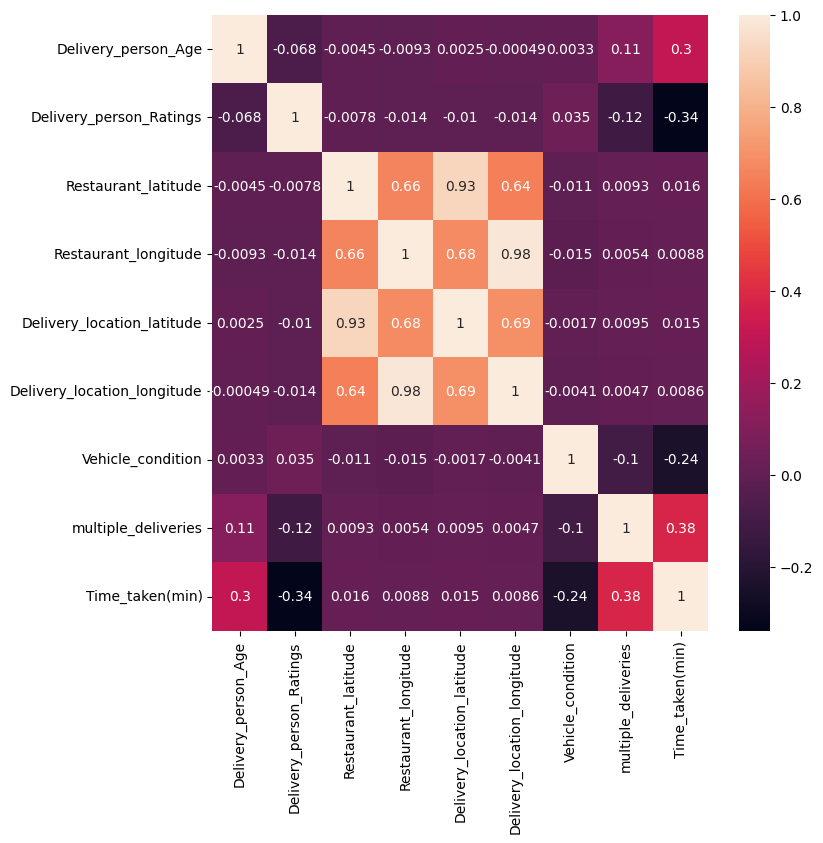

In [66]:
numeric_cols = train.select_dtypes(include=np.number)
plt.figure(figsize=(8,8))
sns.heatmap(numeric_cols.corr(), annot=True)


# **Feature Engineering**

In [67]:
#Column Transformation
import math
#Defining the Haversine formula function
def haversine(lat1,lon1,lat2,lon2):
  #Conversion of latitude and longitude from degrees to radians
  lat1=math.radians(lat1)
  lon1=math.radians(lon1)
  lat2=math.radians(lat2)
  lon2=math.radians(lon2)

  #Radius of the Earth in kilometers
  radius=6371.0

  #Haversine Formula
  dlon=lon2-lon1
  dlat=lat2-lat1
  a=math.sin(dlat/2)**2+math.cos(lat1)*math.cos(lat2)*math.sin(dlon/2)**2
  c=2*math.atan2(math.sqrt(a),math.sqrt(1-a))
  distance=radius*c

  return distance

#Calculation of distance between delivery location and restaurant for each row
train['Distance_km']=train.apply(lambda row: haversine(row['Restaurant_latitude'],row['Restaurant_longitude'],row['Delivery_location_latitude'],row['Delivery_location_longitude']),axis=1)

In [68]:
train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance_km
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0,3.025149
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0,20.183530
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26.0,1.552758
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0,7.790401
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30.0,6.210138


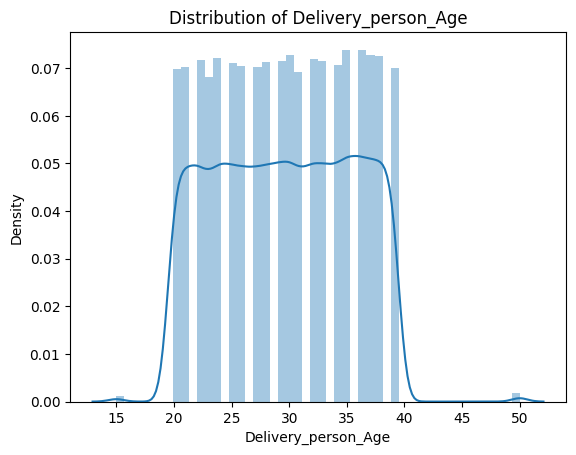

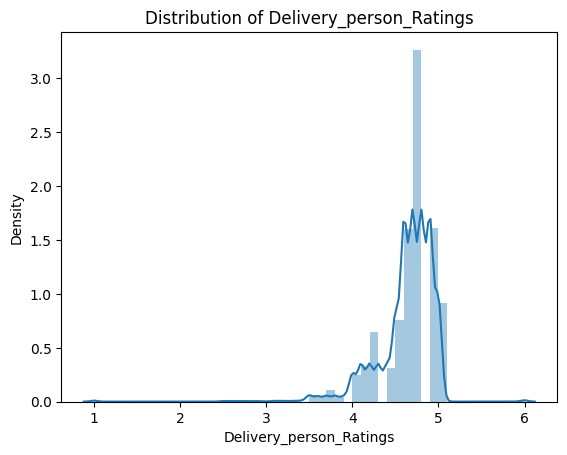

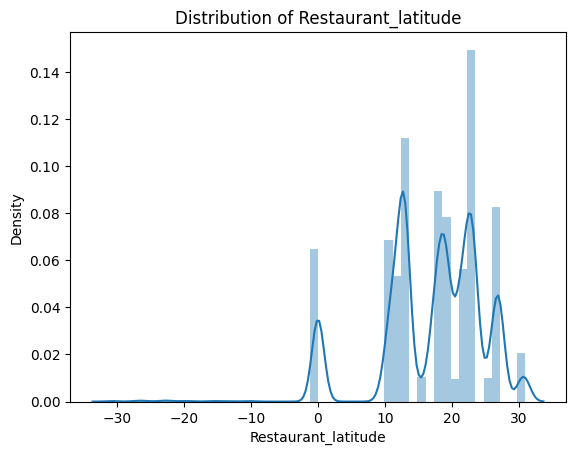

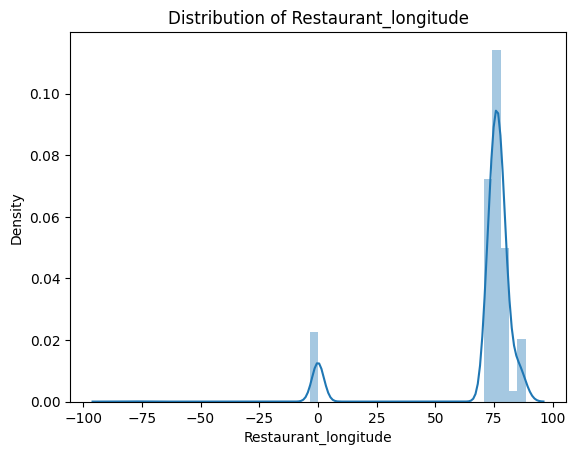

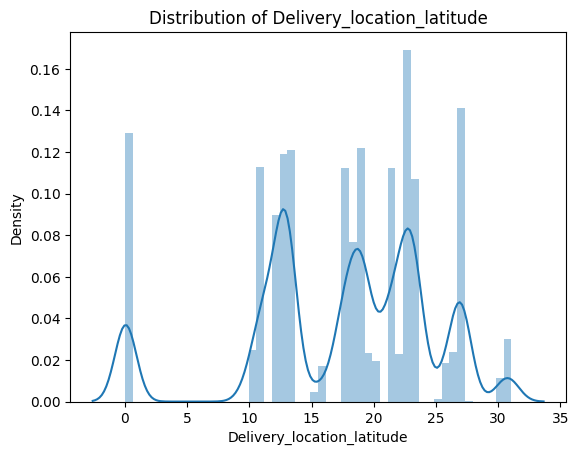

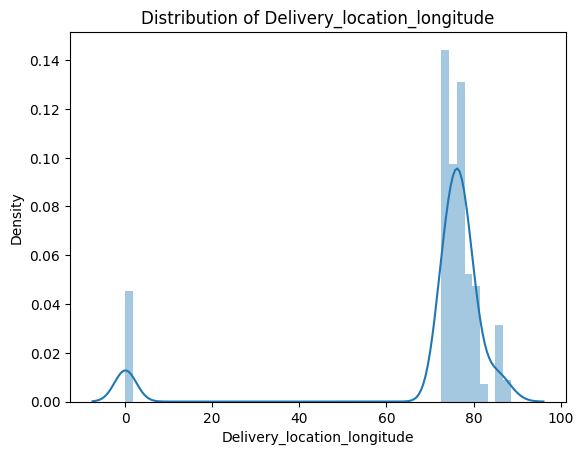

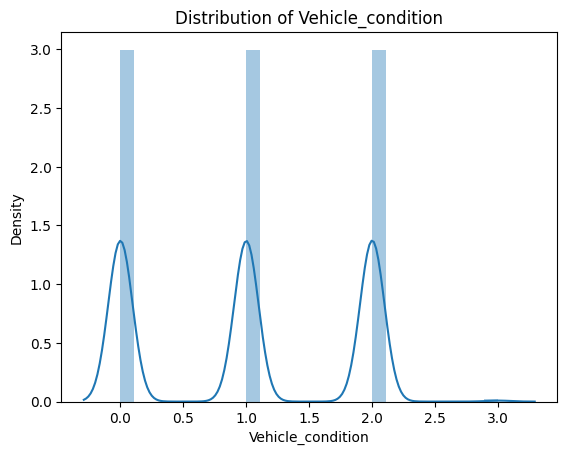

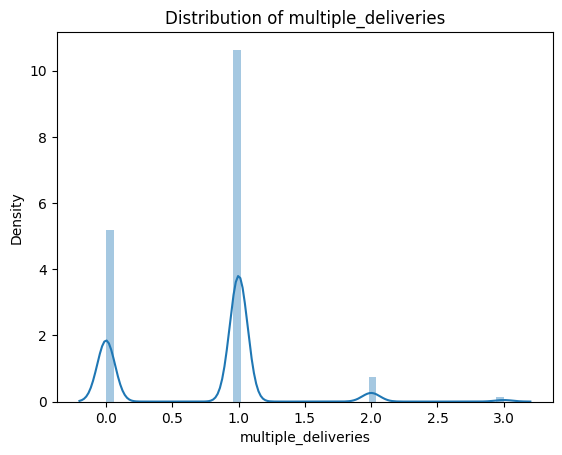

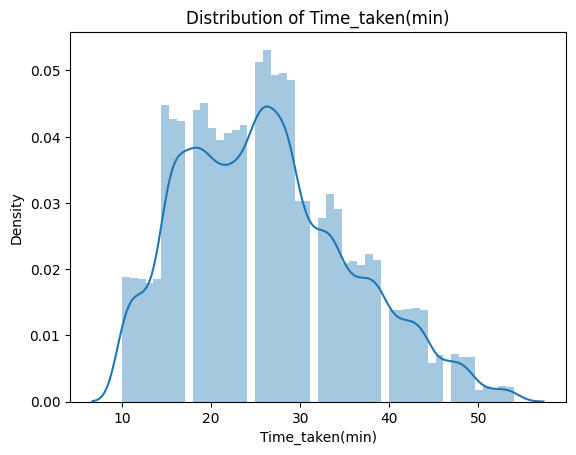

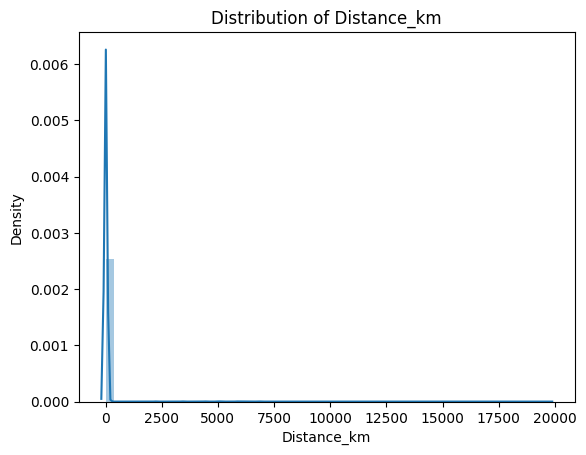

In [69]:
#Data Transformation
for column in train.columns:
  if train[column].dtype!='O':
    sns.distplot(train[column])
    plt.title(f'Distribution of {column}')
    plt.show()

In [70]:
#Applying square root transformation on the columns
train['Delivery_person_Ratings']=np.sqrt(train['Delivery_person_Ratings'])
train['Distance_km']=np.sqrt(train['Distance_km'])

# **Encoding**

In [71]:
import pickle
from sklearn.preprocessing import LabelEncoder

#Creating a dictionary to store label encoders for each categorical column
label_encoders = {}

#Identifying and initializing label encoders for categorical columns
for column in train.columns:
    if train[column].dtype == 'O':#check if the column is of object datatype
        label_encoders[column] = LabelEncoder()
label_encoders

{'Time_Orderd': LabelEncoder(),
 'Time_Order_picked': LabelEncoder(),
 'Weatherconditions': LabelEncoder(),
 'Road_traffic_density': LabelEncoder(),
 'Type_of_order': LabelEncoder(),
 'Type_of_vehicle': LabelEncoder(),
 'Festival': LabelEncoder(),
 'City': LabelEncoder()}

In [72]:
#Applying label encoding to each categorical column
for column in train.columns:
    if train[column].dtype == 'O':
        train[column] = label_encoders[column].fit_transform(train[column])
        filename=f"{column}.pkl"
        pickle.dump(label_encoders[column],open(filename,'wb'))

In [73]:
train.shape

(43739, 18)

# **Splitting the Dataset into X and y**

In [74]:
#Splitting the Dataset into X and y
X=train.drop('Time_taken(min)',axis=1)
y=train['Time_taken(min)']
y

,Time_taken(min)
0,24.0
1,33.0
2,26.0
3,21.0
4,30.0
...,...
45588,32.0
45589,36.0
45590,16.0
45591,26.0


# **Scaling**

In [75]:
#Scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [76]:

filename="ss.pkl"
pickle.dump(ss,open(filename,'wb'))

# **Train test split**

In [77]:
#Performing Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **Model Building**

### **Training the Model in Multiple Algorithms**

In [78]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def Predictions(model):
  models=model.fit(X_train,y_train)
  y_pred_test=models.predict(X_test)
  y_pred_train=models.predict(X_train)
  print("R2Score for Training",r2_score(y_train,y_pred_train))
  print("R2Score for Testing",r2_score(y_test,y_pred_test))
  print("MSE for Training",mean_squared_error(y_train,y_pred_train))
  print("MSE for Testing",mean_squared_error(y_test,y_pred_test))
  print("MAE for Training",mean_absolute_error(y_train,y_pred_train))
  print("MAE for Testing",mean_absolute_error(y_test,y_pred_test))


#### **1. Decision Tree model**

In [79]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
Predictions(dt)

R2Score for Training 1.0
R2Score for Testing 0.6827478361054977
MSE for Training 0.0
MSE for Testing 27.444787379972563
MAE for Training 0.0
MAE for Testing 4.006744398719707


#### **2. Random Forest Model**

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
Predictions(rf)

R2Score for Training 0.9765640355880374
R2Score for Testing 0.8314183068475605
MSE for Training 2.064135100454402
MSE for Testing 14.583631732967536
MAE for Training 1.140031722442914
MAE for Testing 3.0557201646090535


#### **3. KNN Model**

In [81]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
Predictions(knn)

R2Score for Training 0.7407279619977077
R2Score for Testing 0.6028378768480998
MSE for Training 22.83552342030808
MSE for Testing 34.3576223136717
MAE for Training 3.717853162241719
MAE for Testing 4.557201646090534


#### **4. XG Boost Model**

In [82]:
from xgboost import XGBRegressor
xg=XGBRegressor()
Predictions(xg)

R2Score for Training 0.8780441745787482
R2Score for Testing 0.8296850754288706
MSE for Training 10.741324552805722
MSE for Testing 14.73356977336511
MAE for Training 2.610034088378315
MAE for Testing 3.0740051392719634


# **Performance Testing and Hyperparameter Tuning**

### **1. Implementing RandomSearchCV For XGBoost**

In [83]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={
    'n_estimators':[100,200,300,400],
    'max_depth':[3,4,5,6],
    'learning_rate':[0.01,0.1,0.2,0.3],
    'subsample':[0.7,0.8,0.9,1.0],
    'colsample_bytree':[0.7,0.8,0.9,1.0],
    'gamma':[0,0.1,0.2,0.3],
}

scoring='neg_mean_squared_error'
random_search=RandomizedSearchCV(estimator=xg,
                                 param_distributions=param_grid,
                                 scoring=scoring,
                                 n_iter=25,#Number of random samples to try
                                 verbose=2,#Controls the verbosity of the search process
                                 cv=5, #Number of cross-validation folds
                                 n_jobs=-1,#Use all available CPU cores for parallel processing
                                 random_state=42#Set a random seed for reproducability
                                 )



In [84]:
Predictions(random_search)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
R2Score for Training 0.8665828581565307
R2Score for Testing 0.8328544907733806
MSE for Training 11.750786126848633
MSE for Testing 14.459390618269339
MAE for Training 2.744032332039408
MAE for Testing 3.0491585642113006
